In [1]:
'''
Regression Metrics:
1.Mean Squared Error (MSE)
2.Root Mean Squared Error (RMSE)
3.Mean Absolute Error (MAE)
4.R Squared (R²)
'''

'\nRegression Metrics:\n1.Mean Squared Error (MSE)\n2.Root Mean Squared Error (RMSE)\n3.Mean Absolute Error (MAE)\n4.R Squared (R²)\n'

## Mean Squared Error (MSE) : It is perhaps the most simple and common metric for regression evaluation, but also probably the least useful. It is defined by the equation.

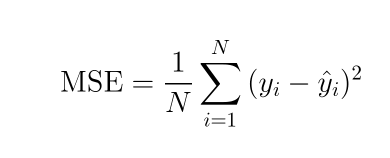

## where yᵢ is the actual expected output and ŷᵢ is the model’s prediction. The higher this value, the worse the model is. It is never negative, since we’re squaring the individual prediction.

## RMSE is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

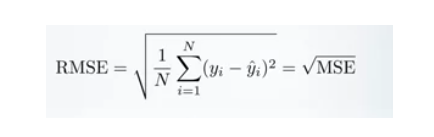

## R² is always going to be between - ∞ and 1. When R² is negative it means that the model is worse than predicting the mean.

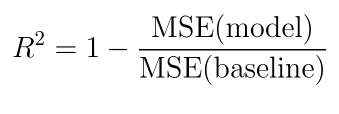

## Common Misconception: the range of R² lies between 0 and 1 which is not actually true.
## The maximum value of R² is 1 but minimum can be minus infinity.

In [2]:
import numpy as np
import pandas as pd # wrangling and cleaning
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
df=pd.read_csv('advertising.csv')
#see first 5 records
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# remove unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


TV           0
radio        0
newspaper    0
sales        0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

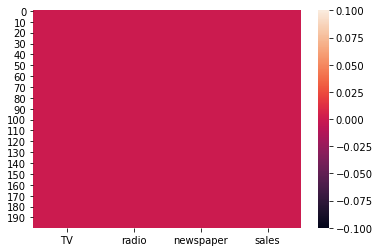

In [5]:
# we wish to predict sales , therefore we apply regression algorithm
# we check null values
print(df.isnull().sum())
# visualise
sns.heatmap(df.isnull())
plt.show

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


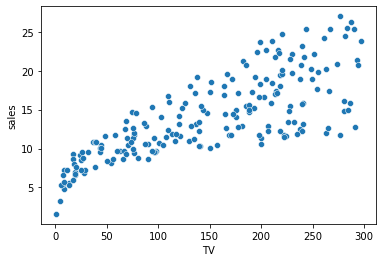

In [7]:
# the data has no null values and no categorical data(object)
# we need to establish correlation with sales , we use scatter plot
# TV vs sales
sns.scatterplot(data=df,x='TV',y='sales')
plt.show()

In [8]:
'''
It is apparent that TV advertisement has positive and growth effect on sales
'''

'\nIt is apparent that TV advertisement has positive and growth effect on sales\n'

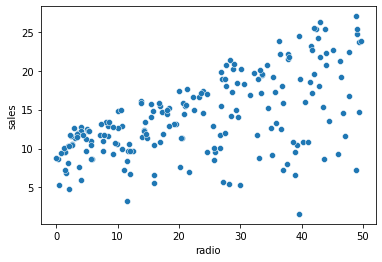

In [9]:
# radio vs sales
sns.scatterplot(data=df,x='radio',y='sales')
plt.show()

In [10]:
'''
It is apparent that radio advertisement has nuetral effect on sales
but positive and sales growth can be seen
'''

'\nIt is apparent that radio advertisement has nuetral effect on sales\nbut positive and sales growth can be seen\n'

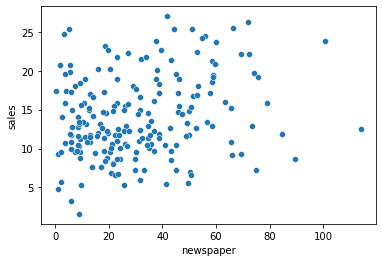

In [11]:
# newspaper vs sales
sns.scatterplot(data=df,x='newspaper',y='sales')
plt.show()

In [12]:
'''
It is apparent that newspaper advertisement has no real effect on sales
The data is scattered which can't be termed as negative or positive either
if we consider sales
'''

"\nIt is apparent that newspaper advertisement has no real effect on sales\nThe data is scattered which can't be termed as negative or positive either\nif we consider sales\n"

In [13]:
# we now check correlation 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

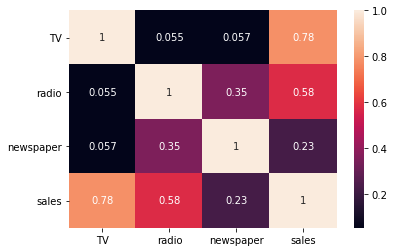

In [14]:
# visualise the above data
sns.heatmap(df.corr(),annot=True)

In [15]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

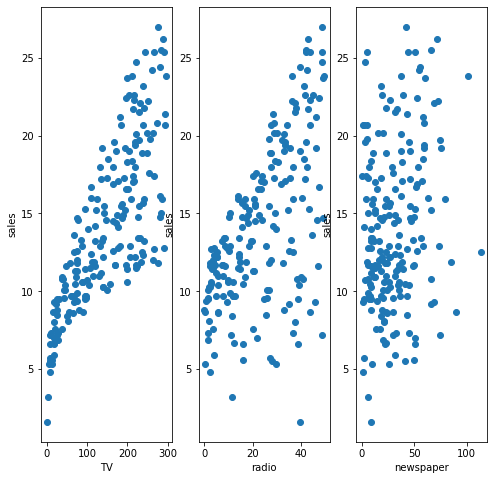

In [16]:
x=['TV', 'radio', 'newspaper'] # save in a variable
y=df['sales']
plt.figure(figsize=(8,8))
for i,col in enumerate(x): # enumerate helps in returning two values and is used with list only
    # first it will give index and then value
    plt.subplot(1,3,i+1) # subplot(rows,columns)
    plt.xlabel(col)
    plt.ylabel('sales')
    plt.scatter(df[col],y)
    
plt.show()

In [17]:
#Performing the modeling 
#Modeling with input : TV and output sales 
#SLR : only one input
#Select input and output from dataset
X=df[["TV"]]
Y=df["sales"]

In [18]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [20]:
#input always 2D

In [21]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
#train_test_split()  : this function define in inbuilt class
#train_test_split class
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [24]:
X_train.head(20)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [25]:
# performing linear regression
# using LinearRegression class

from sklearn.linear_model import LinearRegression

In [26]:
# create a object of LinearRegression
lr = LinearRegression()

In [27]:
# train the model with 70% data
lr.fit(X_train,Y_train) # fit is inbuilt and X is input while Y is output

LinearRegression()

In [28]:
# check slope/coefficient and intercept
print('slope :',lr.coef_)
print('intercept :',lr.intercept_)

slope : [0.04812204]
intercept : 6.923519536059554


In [29]:
# testing the model post training using predict() inbuilt method of LR class
Y_pred = lr.predict(X_test) # Y_pred = m*X_test + b
print(Y_pred)

[17.06764591 16.66823297 11.52879892 20.4073156  19.1368937  20.57093054
 14.78184893 15.62398466 10.32093567 17.2890073  14.83959538 10.25356482
 17.25532187 12.20731971 17.78947654 12.97246017 13.26119242 20.91259704
  8.1554438  17.06283371 11.75497252 10.18619396  8.13138278 12.09182681
 12.35649804 15.98971218  8.99757953 18.89628349 14.95027608 18.47762173
 18.46799732 18.2081383  14.12738917 15.11389102 18.87703468 15.82128503
 17.62586159 13.15051172 17.35637816  7.86671155  7.55391828 11.2737521
  7.82340171 16.74522823  7.27481044 14.01189627 10.68666319 17.89534503
 16.78853807 17.96752809 20.864475   12.84734286  7.85708714 15.71060434
 19.70473379 14.89252963 17.43818563  8.12657058 18.0926454   8.99276733]


In [30]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [31]:
# 2nd August 2021

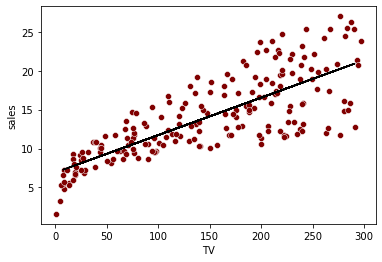

In [32]:
# Visualise predicted line
# first visualise original data
sns.scatterplot(data=df,x='TV',y='sales',color='maroon')
plt.plot(X_test,Y_pred,color='black') # draw the predicted line
plt.show()# the black line is predicted line , which helps with slope and intercept

In [33]:
# checking mean squared error using inbuilt class mean_squared_error defined in sklearn.metrics
from sklearn.metrics import mean_squared_error
# formula is Summation(Actual output - predicted output)sqr. / N
mean_squared_error(Y_test,Y_pred) # Y_test - Actual output , Y_pred - predicted output

10.571057434656955

## TSS and RSS
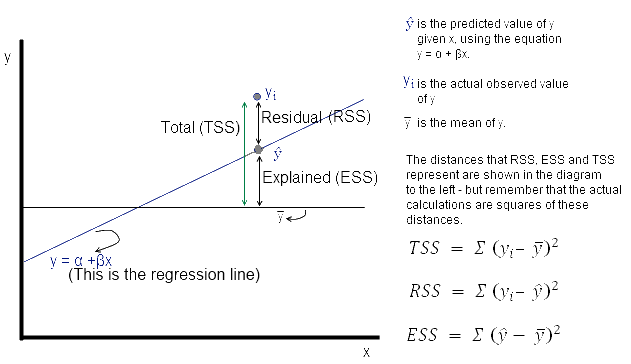

In [34]:
# Evaluation of Model : find r2-score means r-squared(0-1) , nearer to 1 the better it is
# formula - (TSS-RSS)/TSS , TSS- total sum of squared error , RSS -  residual sum of squared error
# it is defined in sklearn
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.575061860494331

In [35]:
#Performing the modeling 
#Modeling with input : radio and output sales 
#SLR : only one input
#Select input and output from dataset
X=df[["radio"]] # input always 2D
Y=df["sales"] # ouput always 1D

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [37]:
# create object of LinearRegression class
lr1=LinearRegression()

In [38]:
# train the model
lr1.fit(X_train,Y_train)

LinearRegression()

In [39]:
# check slope/coefficient and intercept
print('slope :',lr1.coef_)
print('intercept :',lr1.intercept_)

slope : [0.1874808]
intercept : 9.440936561425886


In [40]:
# testing the model post training using predict() inbuilt method of LR class
Y_pred = lr1.predict(X_test) # Y_pred = m*X_test + b
print(Y_pred)

[18.73998434 13.62175845  9.70340968 11.33449266 13.43427764 17.31513024
 15.3653299  11.46572922 12.44062939 13.86548349 13.35928532 13.284293
 13.94047581 18.4025189  10.97827914 16.35897815 12.89058332 10.20960785
 16.75268784 14.97162022 11.24075226 16.30273391 14.25919317 12.06566779
 12.70310252 12.83433908 14.44667397 14.5216663  17.31513024 12.57186595
 17.22138984 10.07837129 16.11525311 10.90328682 15.10285678 13.3780334
 10.07837129 10.50957713 17.67134377 13.20930068  9.51592888  9.4971808
 11.70945427 15.60905495 14.7091471  13.92172773 18.21503809 16.5089628
 17.89632073 15.49656647 17.37137449 15.92777231 12.44062939 18.10254961
 13.1905526  11.31574458 10.45333289 11.50322538 11.05327146 14.29668933]


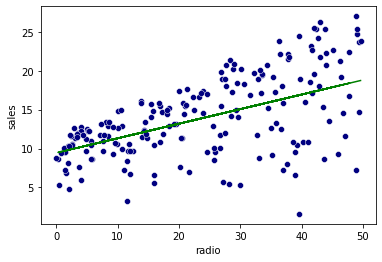

In [41]:
# Visualise predicted line
# first visualise original data
sns.scatterplot(data=df,x='radio',y='sales',color='navy')
plt.plot(X_test,Y_pred,color='green') # draw the predicted line
plt.show()# the green line is predicted line , which helps with slope and intercept

In [42]:
# checking mean squared error using inbuilt class mean_squared_error defined in sklearn.metrics
# formula is Summation(Actual output - predicted output)sqr. / N
mean_squared_error(Y_test,Y_pred) # Y_test - Actual output , Y_pred - predicted output

# greater the mean squared error - lesser will be the r2 score
# therefore the mean squared error should be as close to 0 as possible

14.604130559272193

In [43]:
# Evaluation of Model : find r2-score means r-squared(0-1) , nearer to 1 the better it is
# formula - (TSS-RSS)/TSS , TSS- total sum of squared error , RSS -  residual sum of squared error
# it is defined in sklearn
r2_score(Y_test,Y_pred)

0.41293932917162335

In [44]:
#Performing the modeling 
#Modeling with input : newspaper and output sales 
#SLR : only one input
#Select input and output from dataset
X=df[["newspaper"]] # input always 2D
Y=df["sales"] # ouput always 1D

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [46]:
# create object of LinearRegression class
lr2=LinearRegression()

In [47]:
# train the model
lr2.fit(X_train,Y_train)

LinearRegression()

In [48]:
# check slope/coefficient and intercept
print('slope :',lr2.coef_)
print('intercept :',lr2.intercept_)

slope : [0.06532045]
intercept : 11.82966888487788


In [49]:
# testing the model post training using predict() inbuilt method of LR class
Y_pred = lr2.predict(X_test) # Y_pred = m*X_test + b
print(Y_pred)

[14.29224978 13.89379505 12.3130402  13.22752647 13.78928233 16.15388255
 15.28512059 15.64438305 14.49474317 15.5921267  14.92585813 13.02503309
 12.09095068 15.18713992 15.5202742  17.00304838 14.08975639 12.38489269
 12.43714905 12.43714905 12.0648225  19.27619997 14.65804429 12.54166177
 14.35103818 13.50187236 14.12241661 13.32550715 12.0648225  13.32550715
 13.03809717 17.36884288 12.22159157 14.12894866 13.15567398 13.26671874
 12.68536676 13.87419891 13.60638507 12.9401165  13.50187236 13.34510328
 13.35816737 14.8344095  14.53393544 13.07728944 14.08322434 13.91992322
 13.10994967 16.67644613 15.17407583 12.63964244 13.28631488 15.66397919
 11.84926502 12.97930877 13.61944916 13.76968619 12.39795678 13.16873807]


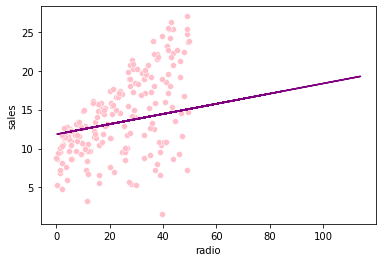

In [50]:
# Visualise predicted line
# first visualise original data
sns.scatterplot(data=df,x='radio',y='sales',color='pink')
plt.plot(X_test,Y_pred,color='purple') # draw the predicted line
plt.show()# the purple line is predicted line , which helps with slope and intercept

In [51]:
# checking mean squared error using inbuilt class mean_squared_error defined in sklearn.metrics
# formula is Summation(Actual output - predicted output)sqr. / N
mean_squared_error(Y_test,Y_pred) # Y_test - Actual output , Y_pred - predicted output

# greater the mean squared error - lesser will be the r2 score
# therefore the mean squared error should be as close to 0 as possible

25.497452374414927

In [52]:
# Evaluation of Model : find r2-score means r-squared(0-1) , nearer to 1 the better it is
# formula - (TSS-RSS)/TSS , TSS- total sum of squared error , RSS -  residual sum of squared error
# it is defined in sklearn
r2_score(Y_test,Y_pred)

-0.024953278429509007

In [53]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02
'''

' \nslope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02\n'

In [54]:
# underfit is when information is not defined amply
# oval can be a ball as well as apple , hence more parameters needs to be defined to get more accurate 
# we should not put too many parameters as it will lead to overfitting

In [55]:
# Multi Linear regression (MLR)
# Equation of MLR : Y_pred =m1x1+m2x2+...+mnxn+b
X=df[["TV","radio","newspaper"]] # input always 2D
Y=df["sales"] # ouput always 1D

In [56]:
# train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [57]:
# LinearRegression
lr=LinearRegression()

In [58]:
# train the model using fit
lr.fit(X_train,Y_train)

LinearRegression()

In [59]:
# check slope/coefficient and intercept
print('slope :',lr.coef_)
print('intercept :',lr.intercept_)

slope : [0.04695205 0.17658644 0.00185115]
intercept : 2.9372157346906125


In [60]:
# testing the model post training using predict() inbuilt method of LR class
Y_pred = lr.predict(X_test) # Y_pred = m1*TV+m2*radio+m3*newspaper + b
print(Y_pred)

[21.66318307 16.44137936  7.69144625 17.9163172  18.67047113 23.79199311
 16.2825425  13.44138683  9.15294033 17.32475313 14.43922876  9.84019547
 17.26329945 16.62853147 15.09158705 15.50173894 12.43404074 17.32591521
 11.04327486 18.05652777  9.35309526 12.79465958  8.73413846 10.47225333
 11.38216042 15.02658554  9.7406823  19.44676903 18.19211174 17.20178728
 21.56359539 14.70484262 16.2635213  12.37098906 19.97059316 15.36768988
 14.00399515 10.0772945  20.91891557  7.43833283  3.67031166  7.27760354
  5.99523188 18.41497546  8.31868226 14.1090252  14.93697583 20.35882814
 20.56271636 19.55380813 24.10360923 14.84985778  6.71474914 19.77761567
 18.93996367 12.5109195  14.20052652  6.10844697 15.3695344   9.56769111]


In [61]:
mean_squared_error(Y_test,Y_pred)
# it can be seen that considering individual elements we do not get good MSE
# which was underfit
# therefore taking all elements together we have MSE which removes underfitting

1.9289249074665737

In [62]:
# Evaluation of Model : find r2-score means r-squared(0-1) , nearer to 1 the better it is
# formula - (TSS-RSS)/TSS , TSS- total sum of squared error , RSS -  residual sum of squared error
# it is defined in sklearn
r2_score(Y_test,Y_pred)

0.9224605706201434

In [63]:
#here r2-score is best because it is nearest to +1 and MSE is very low which
# means we have created a successful model 
# but yet we need >95% r2_score , hence we redo the calculation ignoring newspaper

In [64]:
# Regression has following Assumptions 
'''
1. There should not be Multicollinearity(occurrence of high intercorrelations among two or more independent variables in a multiple regression model.)
in multiple linear regression.
 Solving this assumption , means we remove the Multicolinearity situation
2. Assumption:Linear relationship means there should be A linear relationship is one where increasing or decreasing one variable will cause a corresponding increase or decrease in the other variable too. 
 when does Linear Regression perform best ? 
 where got better Linear relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error which means 
 Residual =(actual output-predicted output)
 '''

'\n1. There should not be Multicollinearity(occurrence of high intercorrelations among two or more independent variables in a multiple regression model.)\nin multiple linear regression.\n Solving this assumption , means we remove the Multicolinearity situation\n2. Assumption:Linear relationship means there should be A linear relationship is one where increasing or decreasing one variable will cause a corresponding increase or decrease in the other variable too. \n when does Linear Regression perform best ? \n where got better Linear relationship \n \n we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is erro\n we calculate the residual (this is error means \n Residual =(actual output-predicted output)\n '

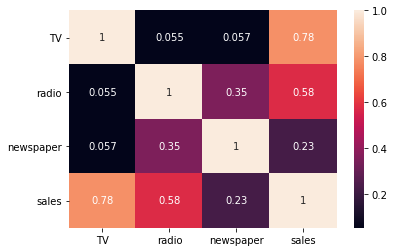

In [65]:
#Visualise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()

In [66]:
#here input radio and newspaper both are correlated each other value of corr 
# of radio and newspaper = 0.35, which means multicollinearity situation occurs
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so we remove newspaper from dataset 
#and perform TV and radio with sales 

In [67]:
'''
In regression analysis , Homoscedasticity means a situation in which 
the Variance (Variance is a measure of dispersion. It is the average
squared distance between the mean and each item in the population or
in the sample.) of the dependent variable is the same for all the data.
Homoscedasticity is facilitates analysis because most methods are based
on the assumption of equal variance.

In regression analysis , Heteroscedasticity means a situation in which 
the variance of the dependent variable varies across the data.
Heteroscedasticity complicates analysis because many methods in regression
analysis are based on an assumption of equal variance.
'''

'\nIn regression analysis , Homoscedasticity means a situation in which \nthe Variance (Variance is a measure of dispersion. It is the average\nsquared distance between the mean and each item in the population or\nin the sample.) of the dependent variable is the same for all the data.\nHomoscedasticity is facilitates analysis because most methods are based\non the assumption of equal variance.\n\nIn regression analysis , Heteroscedasticity means a situation in which \nthe variance of the dependent variable varies across the data.\nHeteroscedasticity complicates analysis because many methods in regression\nanalysis are based on an assumption of equal variance.\n'

In [68]:
#Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedatik 
#not a heteroskedastik

In [69]:
#trick
#find the residuals 
residuals=Y_test-Y_pred
print(residuals)

58     2.136817
40     0.158621
34     1.808554
102   -3.116317
184   -1.070471
198    1.708007
95     0.617457
4     -0.541387
29     1.347060
168   -0.224753
171    0.060771
18     1.459805
11     0.136701
89     0.071469
110   -1.691587
118    0.398261
159    0.465959
35    -4.525915
136   -1.543275
59     0.343472
51     1.346905
16    -0.294660
44    -0.234138
94     1.027747
31     0.517840
162   -0.126586
38     0.359318
28    -0.546769
193    1.407888
27    -1.301787
47     1.636405
165   -2.804843
194    1.036479
177   -0.670989
176    0.229407
97     0.132310
174   -2.503995
73     0.922706
69     1.381084
172    0.161667
108    1.629688
107    1.422396
189    0.704768
14     0.585025
56    -2.818682
19     0.490975
114   -0.336976
39     1.141172
185    2.037284
124    0.146192
98     1.296391
123    0.350142
119   -0.114749
53     1.422384
33    -1.539964
179    0.089081
181   -2.000527
106    1.091553
199   -1.969534
138    0.032309
Name: sales, dtype: float64


In [70]:
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

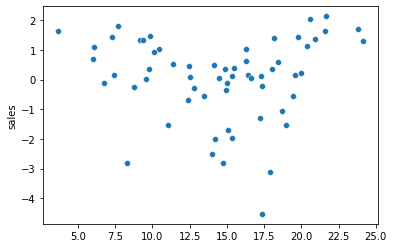

In [71]:
#visualize scatterplot between Y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on y_pred value
plt.figure()
sns.scatterplot(Y_pred,residuals)

plt.show()

In [72]:
#work on first assumption
#First there should be no multicolinearity
# Multicolinearity means here radio is correlated with sales and newspaper (I/P)
#is correlated with radio(Input) corr value 0.35 that means indirectly newspaper
#also getting corelated with sales
#here correlated with newspaper and sales =0.23 it is bad correlation
#So in this case , remove any one input(radio and newspaper)but which input
#will be remove so we remove those input whose bad correlation with output

In [73]:
#here newspaper is bad correlated with output sales then remove newspaper 
#column means newspaper column input is not imp to predict the value
#of sales(o/p)

In [74]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper with sales
#We have input TV and radio and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [75]:
# train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [76]:
# create object of LinearRegression class
lr=LinearRegression()

In [77]:
# train the model using fit
lr.fit(X_train,Y_train)

LinearRegression()

In [78]:
# check slope/coefficient and intercept
print('slope :',lr.coef_)
print('intercept :',lr.intercept_)

slope : [0.04697554 0.17765046]
intercept : 2.9647671191401574


In [79]:
# testing the model post training using predict() inbuilt method of LR class
Y_pred = lr.predict(X_test) # Y_pred = m1*TV+m2*radio+m3*newspaper + b
print(Y_pred)

[21.6786746  16.43892004  7.70903733 17.92158421 18.67111499 23.74835071
 16.24962798 13.37657045  9.12364788 17.27585015 14.40513872  9.85730919
 17.31402746 16.61437382 15.02857874 15.42489496 12.42021473 17.34892466
 11.09570896 18.10320281  9.38655615 12.65171582  8.70947008 10.49704698
 11.35942404 15.03043294  9.73268033 19.46660993 18.26160716 17.21035792
 21.60669421 14.58454377 16.32136242 12.3456783  19.99853614 15.38120487
 14.01613968 10.05601014 20.94792024  7.45626202  3.65120693  7.26465144
  5.99278035 18.39717578  8.2996665  14.13011074 14.95229617 20.37261349
 20.60678937 19.48376432 24.08819667 14.89416249  6.71850002 19.74995269
 18.99448081 12.52042181 14.18823598  6.09331077 15.39558485  9.58586241]


In [80]:
mean_squared_error(Y_test,Y_pred)

1.9147050289721788

In [81]:
# Evaluation of Model : find r2-score means r-squared(0-1) , nearer to 1 the better it is
# formula - (TSS-RSS)/TSS , TSS- total sum of squared error , RSS -  residual sum of squared error
# it is defined in sklearn
r2_score(Y_test,Y_pred)

0.9230321850256801

In [82]:
#2 assumption  : there should be linear relationship between input and output
#how to check linear relation between input X=[["TV","radio"]] and Y="sales"
#means visualize scatter plot 
#find the residuals 
residuals=Y_test-Y_pred

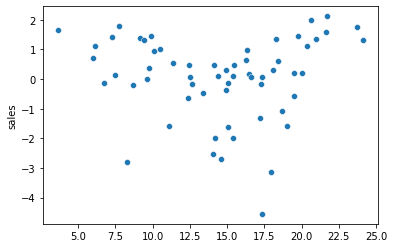

In [83]:
#visualize scatterplot between Y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on y_pred value
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

In [84]:
# it can be seen there is no correlation between Y_pred and residual
# i.e TV and radio has no relation with sales
# the assumption is not satisfied
# since the relationship is not linear there is no point checking Homoscedastic or Heteroscedastic

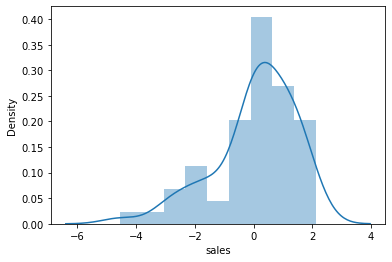

-1.065988117969208


In [85]:
#4. Assumption of linear regression : - Residuals should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()
plt.figure()
sns.distplot(residuals)
plt.show()
from scipy.stats import skew
print(skew(residuals))


In [86]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a AS-symmetric curve means this assumption is not fullfill

In [87]:
#here we handled multicollinearity (removed multicollinearity problem)
#but no results considering 3 assumption
#means no relation , relationship here means to create a curve
#relation should be HOMOSKEDASTIK : means datapoints are close to each other
#should not be Heteroskedastic  means should not be scattered
# only if linear relationship occurs
# no normal distributed curve

In [88]:
#increase the degress of X means increase the power of X means independent vairable
#if increasing the degree or power of independent variable then It is called

## Polynomial Linear Regression



In [89]:
'''Demo of PLR'''
#create numpy 1D array
X=np.arange(-100,100) #arange() inbuilt function here start=-100 ,
#stop=100-1=99 and step=+1 by defualt X=-100,-99,-98,....0,2,3,....99
print(X)
#create user defined function for different power of independent variable X
#Linear  means degree/power=1 of independent variable X means Y=mX+b
def poly_1(X):  #here poly_1()  user defined function it is passing argument 
    #and return value and here X independent variable
    m=4 #slope /gradient/coef 
    b=5 #intercept
    Y=m*X+b
    return Y  #return output

[-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96 

In [90]:
#Main program
#call function
#call function poly_1
Y=poly_1(X) #Y dependent variable
#print(Y)

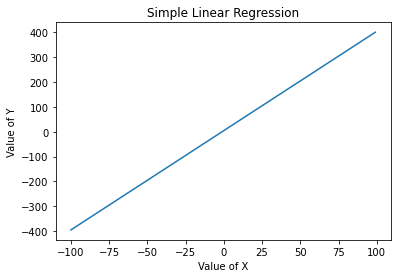

In [91]:
#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Simple Linear Regression")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [92]:
#Quadratic if degree/power of independent variable X=2
#AX^2+BX^1+C=0
def poly_2(X): #here poly_2()  user defined function it is passing argument 
    #and return value and here X independent variable
    m1=6 #suppose coefficient of X^2 =m1
    m2=4 #suppose coefficient of X^1 =m2
    b=5  #suppose intercept b=5
    Y=m1*X**2+m2*X+b
    return Y

In [93]:
#Main program
#call function poly_2
Y=poly_2(X) #Y dependent variable
#print(Y)

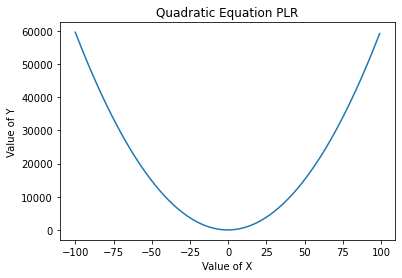

In [94]:
#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Quadratic Equation PLR")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [95]:
#Quadratic if degree/power of independent variable X=3
#Y=m1*X**3+m2*X**2+m3*X+b
def poly_3(X): #here poly_2()  user defined function it is passing argument 
    #and return value and here X independent variable
    m1=8 #suppose coefficient of X^3 =m1
    m2=6 #suppose coefficient of X^2 =m2
    m3=4 #suppose coefficient of X^1 =m3
    b=5  #suppose intercept b=5
    Y=m1*X**3+m2*X**2+m3*X+b
    return Y

In [96]:
#Main program
#call function poly_2
Y=poly_3(X) #Y dependent variable
#print(Y)

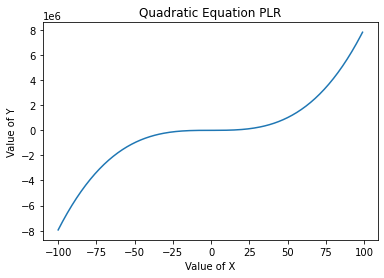

In [97]:
#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Quadratic Equation PLR")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [98]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#equation Y=m1*TV**2+m2*TV+m3*radio**2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1**2+bx1+cx2**2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV**2+m2*TV**1+m3*radio**2+m4*radio**1+b

'''
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))
'''

"\n# importing libraries for polynomial transform\nfrom sklearn.preprocessing import PolynomialFeatures\n# for creating pipeline\nfrom sklearn.pipeline import Pipeline\n# creating pipeline and fitting it on data\nInput=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]\npipe=Pipeline(Input)\npipe.fit(x.reshape(-1,1),y.reshape(-1,1))\n"

In [99]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

In [100]:
X=df[["TV","radio"]]
Y=df["sales"]

In [101]:
# creating object and assigning degree of independent variable
pf=PolynomialFeatures(3) # 3 is degree assigned

In [102]:
#we create polynomial version of X so we call fit_transform() : inbuilt
#method of PolynomialFeatures class
X_poly=pf.fit_transform(X)

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [104]:
lr=LinearRegression()

In [105]:
# train the model using fit
lr.fit(X_train,Y_train)

LinearRegression()

In [106]:
# testing the same
Y_pred=lr.predict(X_test)

In [107]:
mean_squared_error(Y_test,Y_pred)

0.14469078645893926

In [108]:
r2_score(Y_test,Y_pred)

0.994183681814092

In [109]:
residuals=Y_test-Y_pred

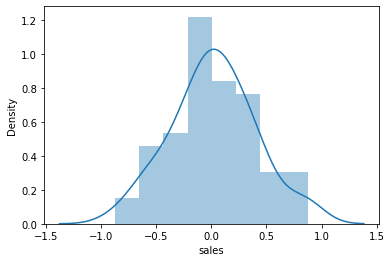

In [110]:
#plot normal distribution curve
plt.figure()
sns.distplot(residuals)
plt.show()

In [111]:
print("skew ness : ",skew(residuals))

skew ness :  0.06955995079333084


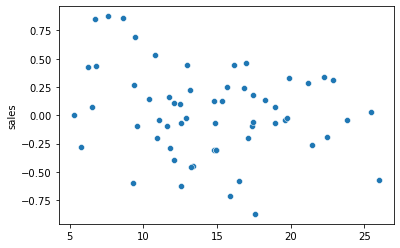

In [112]:
#next assumption 
#there should be a linear regression
#plot scatter plot 
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

In [113]:
#here this is linear relation ship between residuals and Y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroskadastic but should be homoskedastik
#means datapoints are close each other